In [1]:
# Model Evaluation
# Import Data Library
import numpy as np
import pandas as pd

# Import Graph Library
import matplotlib.pyplot as plt
import seaborn as sb

# Import Machine Learning Library
import sklearn.linear_model as skl
import sklearn.neighbors as skn

# Import Data Selection Library
import sklearn.model_selection as skms

# Import Evaluation Library
import sklearn.metrics as skmt


In [11]:
# Set Data
data_df = pd.read_excel('./data/귤품질정보.xlsx')
print (data_df.info())
print (data_df.isna().sum())
print (data_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    105 non-null    datetime64[ns]
 1   Sour    105 non-null    float64       
 2   Sweet   105 non-null    float64       
 3   Flesh   105 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 3.4 KB
None
Date     0
Sour     0
Sweet    0
Flesh    0
dtype: int64
          Date  Sour  Sweet  Flesh
0   2010-08-05  3.41   6.54  57.70
1   2010-08-06  3.75   6.50  60.46
2   2010-08-18  3.34   6.36  68.21
3   2010-08-31  2.92   6.17  73.65
4   2010-09-16  2.29   6.52  79.37
..         ...   ...    ...    ...
100 2021-10-01  1.10   7.67  83.75
101 2021-10-15  0.93   8.39  83.15
102 2021-11-01  0.90   9.16  81.93
103 2021-11-15  0.90   9.31  81.12
104 2021-11-25  0.89   9.95  80.24

[105 rows x 4 columns]


In [29]:
# Modify Data
modified_data = data_df.copy()
modified_data['Year'] = modified_data['Date'].dt.year
modified_data['Month'] = modified_data['Date'].dt.month
modified_data['Day'] = modified_data['Date'].dt.day
modified_data = modified_data.drop(columns='Date')
modified_data.corr()

,Sour,Sweet,Flesh,Year,Month,Day
Sour,1.000000,-0.761465,-0.829606,-0.148696,-0.927995,-0.251077
Sweet,-0.761465,1.000000,0.526759,0.055484,0.830212,0.192191
Flesh,-0.829606,0.526759,1.000000,0.102154,0.681480,0.193823
Year,-0.148696,0.055484,0.102154,1.000000,0.127384,-0.279312
Month,-0.927995,0.830212,0.681480,0.127384,1.000000,0.085079
Day,-0.251077,0.192191,0.193823,-0.279312,0.085079,1.000000


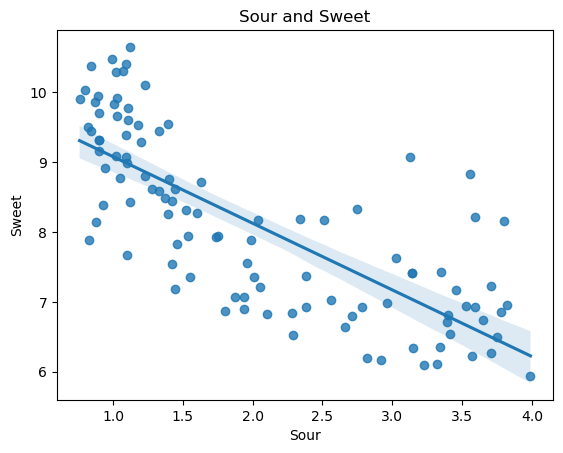

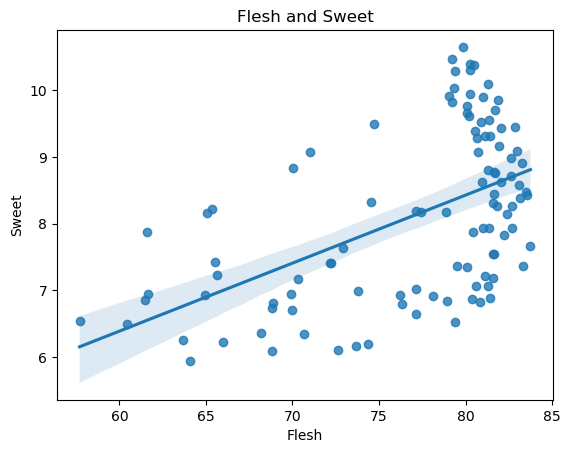

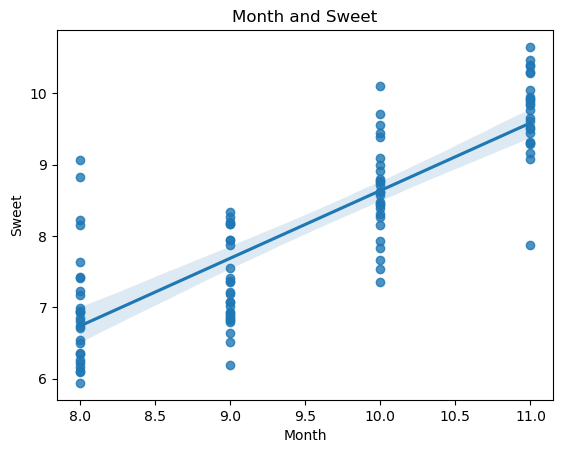

In [31]:
# Data Graph
sb.regplot(x = 'Sour', y = 'Sweet', data = modified_data)
plt.title('Sour and Sweet')
plt.show()
sb.regplot(x = 'Flesh', y = 'Sweet', data = modified_data)
plt.title('Flesh and Sweet')
plt.show()
sb.regplot(x = 'Month', y = 'Sweet', data = modified_data)
plt.title('Month and Sweet')
plt.show()


In [59]:
# Set Train Data and Predict Data
data_x = modified_data[['Sour', 'Flesh', 'Month', 'Day']]
data_y = modified_data['Sweet']
data_train, data_predict, data_train_ans, data_predict_ans = skms.train_test_split(data_x, data_y, train_size=0.8, random_state=0)
data_train

,Sour,Flesh,Month,Day
68,0.90,81.42,11,1
3,2.92,73.65,8,31
74,1.37,83.50,10,1
82,1.42,81.65,10,1
75,1.02,82.96,10,15
...,...,...,...,...
101,0.93,83.15,10,15
67,1.05,81.66,10,15
64,3.14,72.17,9,1
47,2.71,76.32,9,1


In [61]:
# Linear Regression Model
lr_model = skl.LinearRegression()
lr_model = lr_model.fit(data_train, data_train_ans)
lr_model

LinearRegression()

In [63]:
# K Nearest Neighbors Regression Model
knnr_model = skn.KNeighborsRegressor()
knnr_model = knnr_model.fit(data_train, data_train_ans)
knnr_model

KNeighborsRegressor()

In [65]:
# Predict Data
lr_result = lr_model.predict(data_predict)
knnr_result = knnr_model.predict(data_predict)

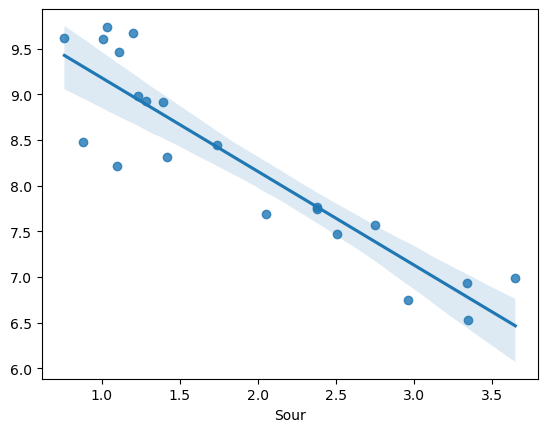

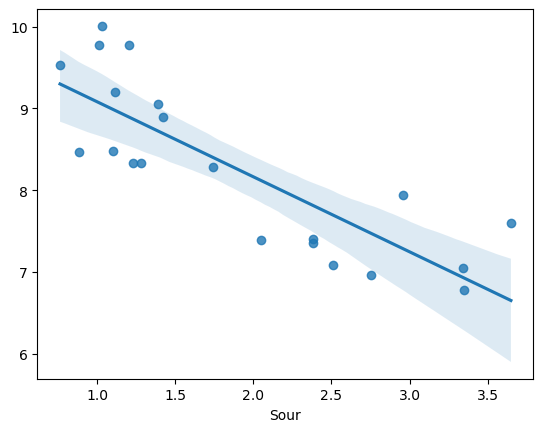

In [67]:
# Predict Graph
sb.regplot(x = 'Sour', y = lr_result, data = data_predict)
plt.show()
sb.regplot(x = 'Sour', y = knnr_result, data = data_predict)
plt.show()

In [69]:
# Evaluation
lr_mse_score = skmt.mean_squared_error(data_predict_ans, lr_result)
lr_rmse_score = np.sqrt(lr_mse_score)
lr_r2_score = skmt.r2_score(data_predict_ans, lr_result)
knnr_mse_score = skmt.mean_squared_error(data_predict_ans, knnr_result)
knnr_rmse_score = np.sqrt(knnr_mse_score)
knnr_r2_score = skmt.r2_score(data_predict_ans, knnr_result)
print ('LR MSE :', lr_mse_score)
print ('LR RMSE :', lr_rmse_score)
print ('LR R2 :', lr_r2_score)
print ('KNNR MSE :', knnr_mse_score)
print ('KNNR RMSE :', knnr_rmse_score)
print ('KNNR R2 :', knnr_r2_score)

LR MSE : 0.29681645572502513
LR RMSE : 0.5448086413824813
LR R2 : 0.7775439071286051
KNNR MSE : 0.5348337142857146
KNNR RMSE : 0.7313232625082526
KNNR R2 : 0.599156259294067
